# Examples

This notebook collects examples of each of the plotting functions.

In future, this might be moved to a different directory / formalized as unit tests. 

## Imports

In [1]:
from hicdash.constants import * 
from hicdash.definitions import *
from hicdash.utilities import *
from hicdash.readers import *
from hicdash.plotters import *

## Read a Sample

Provide **full** paths (relative paths don't work at the moment) to each of the Arima-SV Pipeline output files (replace the below with your own -- the example data is not included with this repository). This particular example is quite old, so doesn't have the greatest quality.

In [2]:
sample = read_sample(
    "EXAMPLE", 
    "/home/wjmn/repos/hicdash/example_data/EXAMPLE_inter_30.hic",
    "/home/wjmn/repos/hicdash/example_data/EXAMPLE_v1.3_Arima_QC_deep.txt",
    "/home/wjmn/repos/hicdash/example_data/EXAMPLE.breaks.bedpe",
    )

# Basic Hi-C Matrix Plots

Here, let's just plot a few really basic Hi-C plots to make sure they work.

### Full Hi-C Matrix

<Axes: >

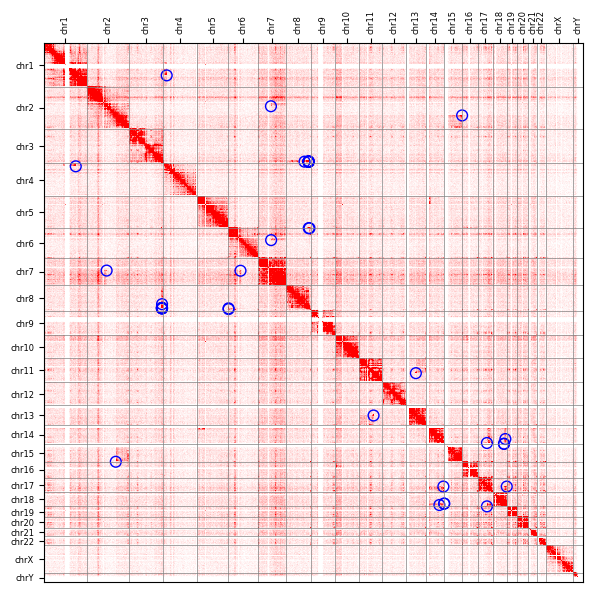

In [3]:
fig, ax = plt.subplots(figsize=(7,7))
plot_full_matrix(sample, show_breakfinder_calls=True, ax=ax)

### Whole Chromosomes

(139, 139) (139, 51) (51, 139) (51, 51)


<Axes: >

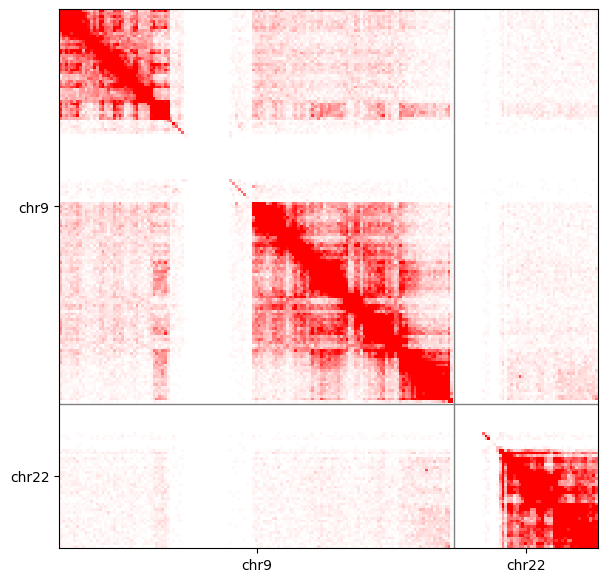

In [4]:
fig, ax = plt.subplots(figsize=(7,7))
plot_hic_chr_context(sample, "chr9", "chr22", 1000000, ax=ax)

## Centered Hi-C Matrix

(<Axes: xlabel='chr1 (Mb)', ylabel='chr1 (Mb)'>,
 (8000000, 12049999),
 (8000000, 12049999))

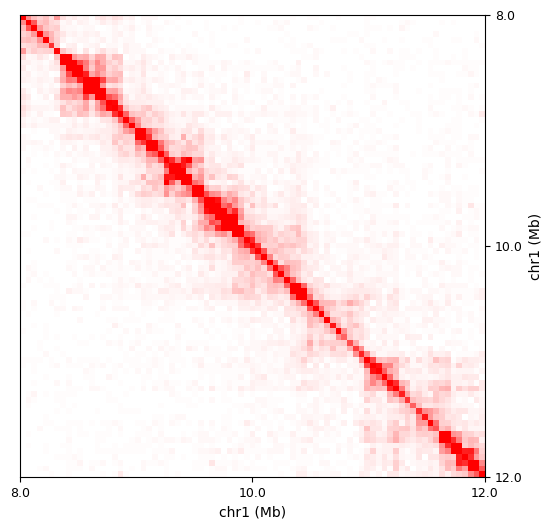

In [5]:
fig, ax = plt.subplots(figsize=(6,6))
call = sample.breakfinder_calls[1]
plot_hic_centered_matrix(sample, "chr1", 10000000, "chr1", 10000000, 50000, 2000000, ax=ax)

# Composites

These are the main figures that will be generated for the dashboard / report.

## Quality Control

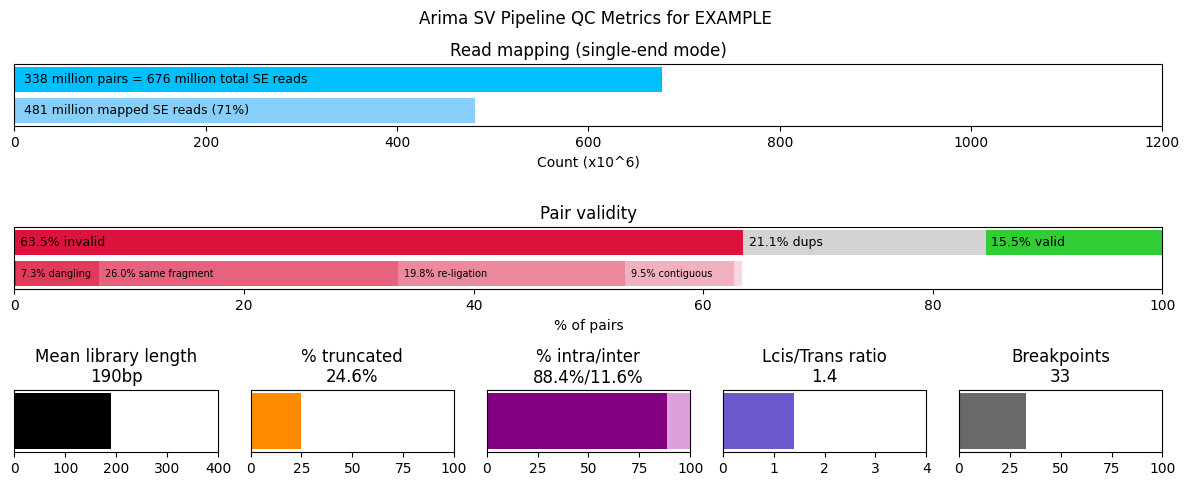

In [6]:
fig = plot_qc(sample)

## Double Full Matrix (Unnanontated vs Annotated)

Useful as a sanity check to visually spot how many translocations are present, any glaring errors in breakfinder calls and anything else unexpected. 

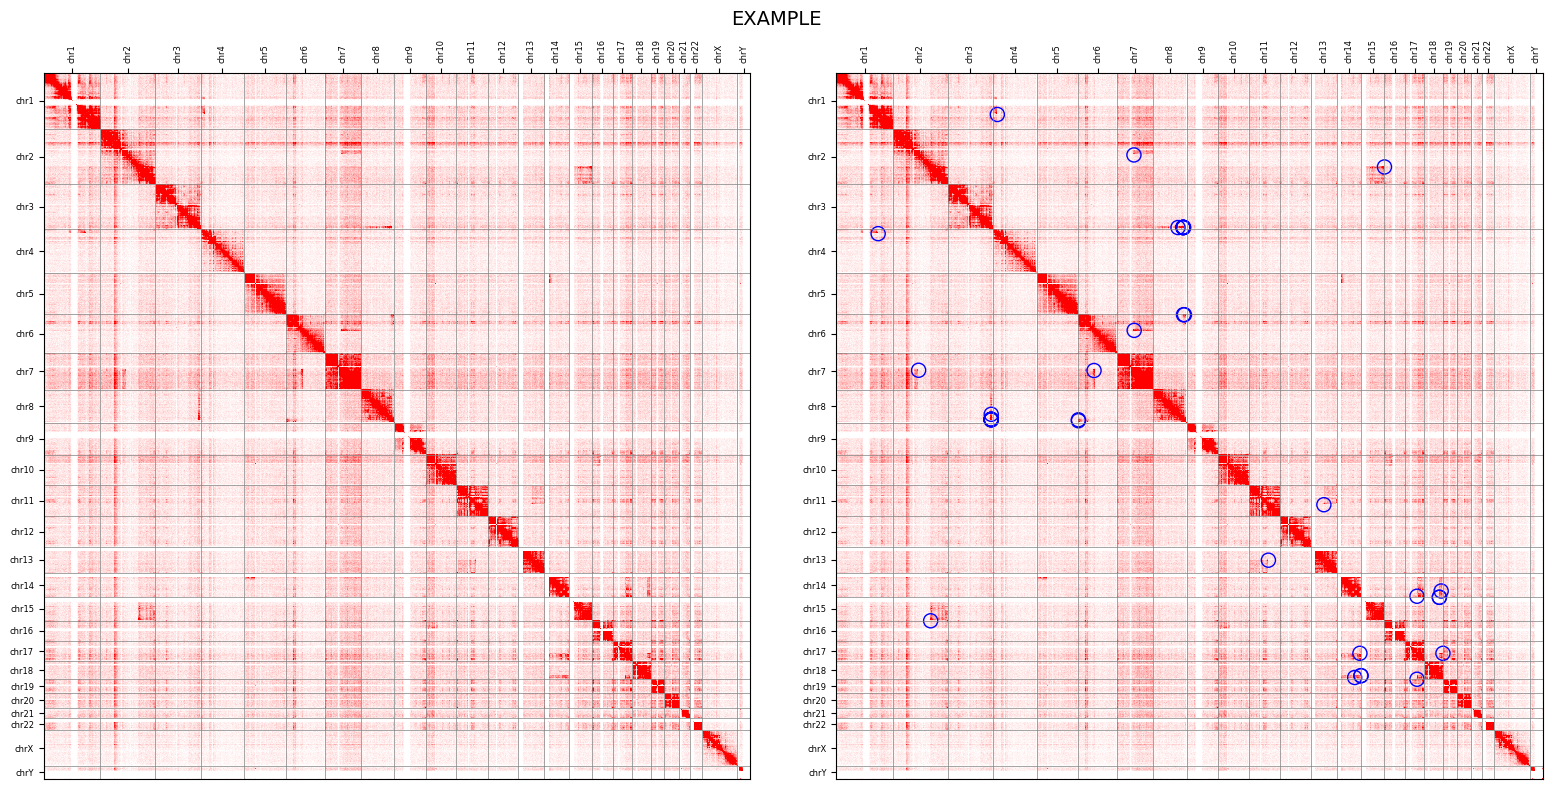

In [7]:
fig = plot_composite_double_whole_matrix(sample)

## Breakpoint with Context

Useful to visually examine breakpoint and see nearby genes as well as coverage on both axes.

(498, 498) (498, 498) (498, 498) (498, 498)


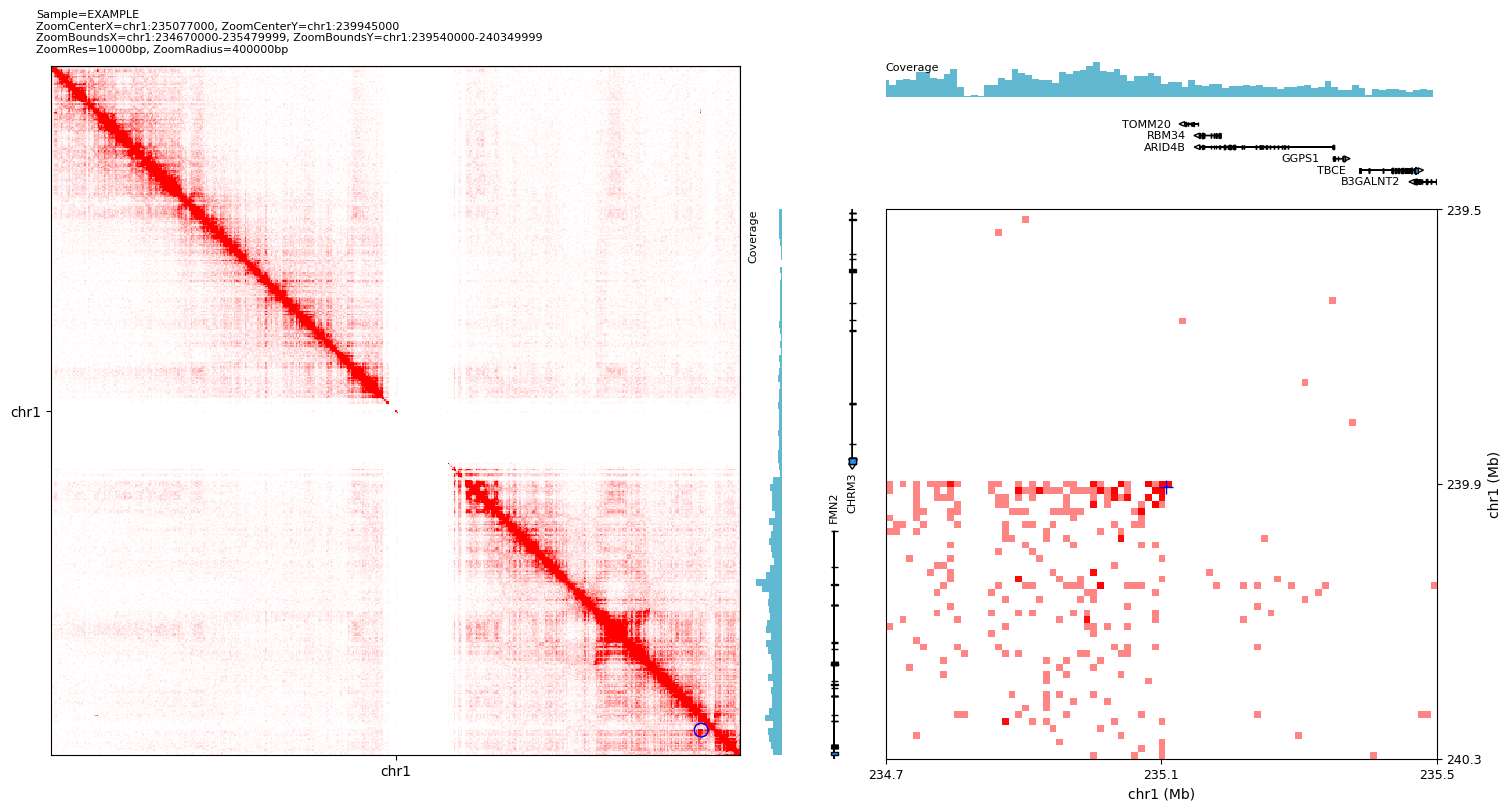

In [8]:
fig = plot_composite_context_and_zoom(sample, sample.breakfinder_calls[0])

## Sample vs Control Comparison

Useful for a quick visual check if a breakpoint is present in a normal / control sample.

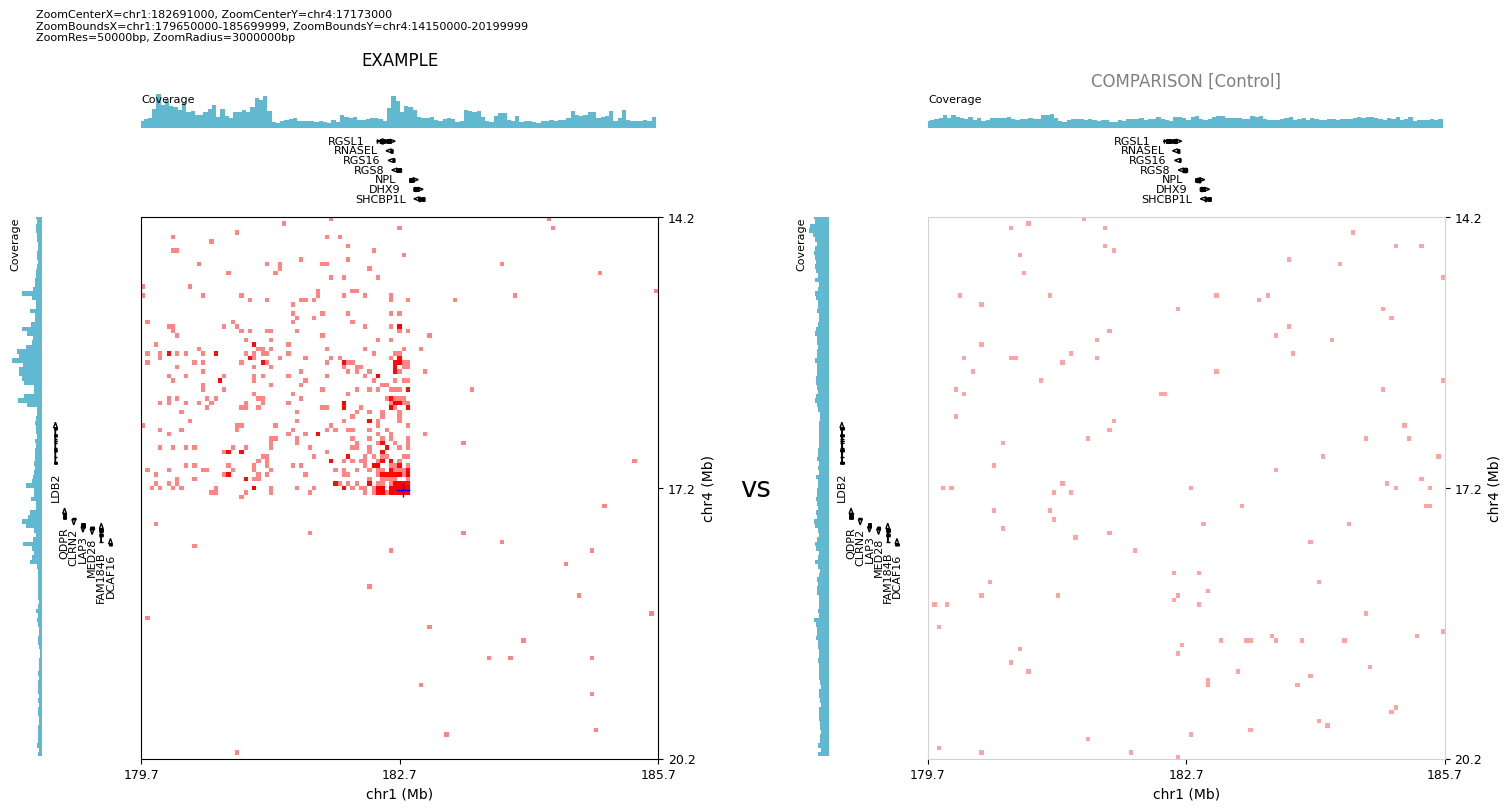

In [11]:
sample2 = read_sample(
    "COMPARISON", 
    "/home/wjmn/repos/hicdash/example_data/COMPARISON_inter_30.hic",
    "/home/wjmn/repos/hicdash/example_data/COMPARISON_v1.3_Arima_QC_deep.txt",
    "/home/wjmn/repos/hicdash/example_data/COMPARISON.breaks.bedpe",
    )
fig = plot_composite_compare_two(sample, sample2, sample.breakfinder_calls[1])